## Métodos de Otimização: Métodos Heuristicos

### Enxame de Partículas

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
from scipy.stats import qmc

In [2]:
def f(x):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x[0])+'\n')
    f.write(str(x[1]))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [3]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

In [4]:
Qtind = 20
Qvar = 2

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
x =np.zeros((Qtind,Qvar) , dtype = 'float')
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

xmin[:] = 0
xmax[:] = 6

In [29]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i] = f(pop[i,:])

#plt.plot(pop[:,0], pop[:,1], 'bo')
#plt.show()

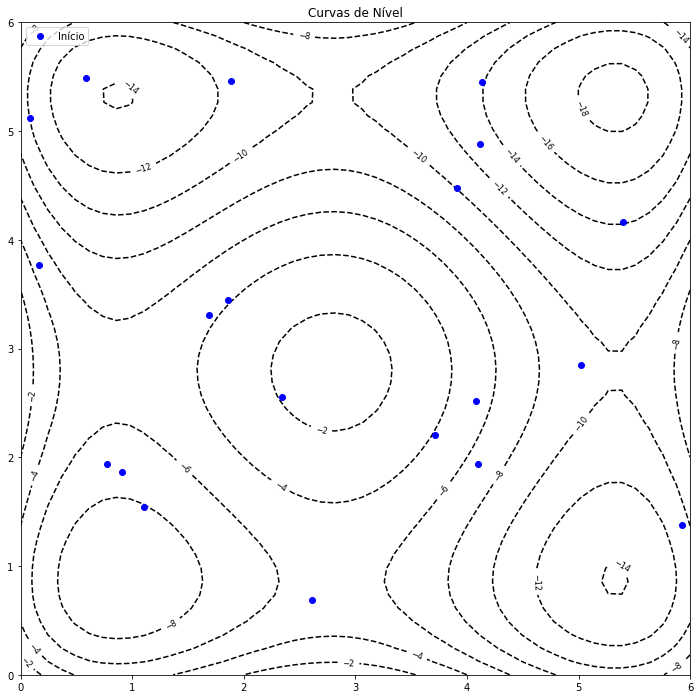

In [30]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(pop[:,0], pop[:,1], 'bo')
plt.legend(['Início', 'Fim'], loc='upper left')
plt.show()

In [ ]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]

In [ ]:
kmax=20
x=pop.copy()
layout = "{0:.5f}"
k=0
while k < kmax:
    k += 1
    for i in range(0, Qtind):
        r1[:] = random.random()
        r2[:] = random.random()
        x[i,:] = x[i,:] + 2.*r1[:]*(pop[i,:]-x[i,:]) + 2.*r2[:]*(pbest[:]-x[i,:])
        x[i,:] = max(min(min(x[i,:]),min(xmax[:])),max(xmin[:]))
        fsol[i] = f(x[i,:])
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
    
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    print(layout.format(pbest[0])+" "+layout.format(pbest[1])+" "+layout.format(fbest))
    

In [ ]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()